<a href="https://colab.research.google.com/github/windopper/NerualNetworkPracticeInJupyter/blob/main/CountBasedWordRepresentation/term_frequency_inverse_document_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference https://wikidocs.net/31698

TF-IDF (단어 빈도 - 역 문서 빈도, Term Frequency-Inverse Document Frequency)

tf(d, t) = 특정 문서 d 에서의 특정 단어 t의 등장 횟수

df(t) = 특정 단어 t가 등장한 문서의 수

idf(d, t) = df(t)에 반비례 하는 수

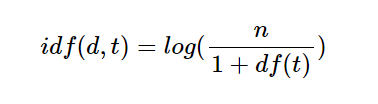


파이썬으로 TF-IDF 구현

In [9]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [22]:
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [14]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
print(result)
tf_

[[0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0], [0, 1, 1, 0, 2, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 1]]


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [21]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [24]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


기본적인 tf-idf 식의 한계점:

idf(d,t) = log(n/df(t)+1) 식에서 문서의 수가 3이고 df(t)값이 2이면 log내부가 1이 되는 문제가 발생하여 가중치의 역할을 못하게됨. 

따라서 많은 머신러닝 패키지에서는 위 식과 약간 다른 조정된 식을 사용함

# 사이킷런을 이용한 DTM과 TF-IDF

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  'you know I want your love',
  'I like you',
  'what should I do'
]

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
